In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

# Introduction

We've already seen two special kinds of matrices:  the inverse and identify matrices. In this lesson, we'll introduce ourselves to some other special types of vectors and matrices.

# 3.6 Special Kinds of Matrices and Vectors

<img src="images/diagonal-and-symmetric-matrices.png" width="400" alt="Diagonal and symmetric matrices" title="Diagonal and symmetric matrices">
<em>Example of diagonal and symmetric matrices</em>


# Diagonal matrices

<img src="images/diagonal-matrix.png" width="150" alt="Example of a diagonal matrix" title="Diagonal matrix">
<em>Example of a diagonal matrix</em>

A matrix $\bs{A}_{i,j}$ is diagonal if its entries are all zeros except on the diagonal (when $i=j$).

### Example 1.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

In this case, the matrix is also a square matrix. But there can be non-square diagonal matrices.

### Example 2.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

Or

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0
\end{bmatrix}
$$

The diagonal matrix can be denoted $diag(\bs{v})$ where $\bs{v}$ is the vector containing the diagonal values.

### Example 3.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

In this matrix, $\bs{v}$ is the following vector:

$$
\bs{v}=
\begin{bmatrix}
    2\\\\
    4\\\\
    3\\\\
    1
\end{bmatrix}
$$

With numpy, you can use `diag()` to create square diagonal matrices:

In [4]:
v = np.array([2, 4, 3, 1])
np.diag(v)

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

If you multiply a diagonal matrix by a vector, you're simply weighting each element of the vector by $v$:

### Example 4.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

and

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}
$$

$$
\begin{align*}
&\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}\\\\
&=\begin{bmatrix}
    2\times3 + 0\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 4\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 3\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 0\times2 + 1\times7
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    1\times7
\end{bmatrix}
\end{align*}
$$

Non square matrices have the same properties:

### Example 5.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

and

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
$$

$$
\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    0
\end{bmatrix}
$$

## Inverse of a diagonal matrix
The inverse of a *square* diagonal matrix exists if all the entries of the diagonal ($\bs{v}$) are non-zero. Note that the inverse doesn't exist if the matrix is non-square.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
\bs{D}^{-1}=
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}
$$

And remember that the multiplication of a matrix with its inverse gives us the identity matrix:

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & 0 & 0\\\\
    0 & 1 & 0 & 0\\\\
    0 & 0 & 1 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

Let's check this with numpy.

In [5]:
A = np.array([[2, 0, 0, 0], [0, 4, 0, 0], [0, 0, 3, 0], [0, 0, 0, 1]])
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [6]:
A_inv = np.array([[1/2., 0, 0, 0], [0, 1/4., 0, 0], [0, 0, 1/3., 0], [0, 0, 0, 1/1.]])
A_inv

array([[ 0.5       ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.25      ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [7]:
A.dot(A_inv)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Great! That gave use the identity matrix.

# Symmetric matrices

<img src="images/symmetric-matrix.png" width="150" alt="Illustration of a symmetric matrix" title="Symmetric matrix">
<em>Illustration of a symmetric matrix</em>

Only square matrices can by symmetric. And a square matirx is only symmetric it is equal to its transpose:
    
$$
\bs{A} = \bs{A}^\text{T}
$$


### Example 6.

$$
\bs{A}=
\begin{bmatrix}
    2 & 4 & -1\\\\
    4 & -8 & 0\\\\
    -1 & 0 & 3
\end{bmatrix}
$$

In [8]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

In [9]:
A.T

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

# Unit vectors

A unit vector is a vector with a length ($L^2$ norm) equal to 1. It can be denoted by a letter with a hat: $\hat{u}$

# Orthogonal vectors
Orthogonal is a fancy word for things that involve right angles or perpendiculars. For example, the line segments $AB$ and $CD$ are orthogonal to each other:

<img src='images/orthogonal_lines.png' height = 300 width = 300 img>

Thus two vectors are orthogonal if they are separated by a 90° angle. This also means that the dot product of two orthogonal vectors gives 0.

### Example 7.

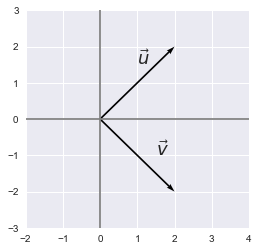

In [11]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

$$
\bs{u}= 
\begin{bmatrix}
    2\\\\
    2
\end{bmatrix}
$$

and

$$
\bs{v}=
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}
$$

$$
\bs{u^\text{T}v}=
\begin{bmatrix}
    2 & 2
\end{bmatrix}
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}=
\begin{bmatrix}
    2\times2 + 2\times-2
\end{bmatrix}=0
$$

In addition, when the norm of orthogonal vectors is the unit norm they are called **orthonormal**.

As a rule, it is impossible to have more than $n$ vectors mutually orthogonal in $\mathbb{R}^n$. For instance try to draw 3 vectors in a 2-dimensional space ($\mathbb{R}^2$) that are mutually orthogonal...


# Orthogonal matrices

Orthogonal matrices are important because they have some interesting properties that make a lot of linear transformations, such as reflections and permutations, computationally cheap. 

#### Definition
A matrix is orthogonal if columns are mutually orthogonal and have a unit norm (orthonormal) and rows are mutually orthonormal and have unit norm. 


<img src="images/orthogonal-matrix.png" width="300" alt="Under the hood of an orthogonal matrix" title="Under the hood of an orthogonal matrix">
<em>Under the hood of an orthogonal matrix</em>

$$
\bs{A}= 
\begin{bmatrix}
    A_{1,1} & A_{1,2}\\\\
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

This means that 

$$
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}
\end{bmatrix}
$$

and 

$$
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}
\end{bmatrix}
$$

are orthogonal vectors and also that the rows

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2}
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

are orthogonal vectors.

## Orthogonal matrix property 1: $\bs{A^\text{T}A}=\bs{I}$


An orthogonal matrix has this property:

$$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$$

We can see that this statement is true with the following reasoning:

Let's have the following matrix:

$$
\bs{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

and thus

$$
\bs{A}^\text{T}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
$$

Let's do the product:

$$
\begin{align*}
&\bs{A^\text{T}A}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
=
\begin{bmatrix}
    aa + cc & ab + cd\\\\
    ab + cd & bb + dd
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    a^2 + c^2 & ab + cd\\\\
    ab + cd & b^2 + d^2
\end{bmatrix}
\end{align*}
$$

We saw in the last lesson on vector norms that the norm of the vector $\begin{bmatrix}
    a & c
\end{bmatrix}$ is equal to $a^2+c^2$. In addtion, we saw that the rows of $\bs{A}$ have a unit norm because $\bs{A}$ is orthogonal. This means that $a^2+c^2=1$ and $b^2+d^2=1$. So we now have:

$$
\bs{A^\text{T}A}=
\begin{bmatrix}
    1 & ab + cd\\\\
    ab + cd & 1
\end{bmatrix}
$$

Also, $ab+cd$ corresponds to the product of $\begin{bmatrix}
    a & c
\end{bmatrix} and \begin{bmatrix}
    b & d
\end{bmatrix}$:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}
=
ab+cd
$$

And we know that the columns are orthogonal which means that:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}=0
$$

We thus have the identity matrix:

$$
\bs{A^\text{T}A}=\begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

## Orthogonal matrix property 2: $\bs{A}^\text{T}=\bs{A}^{-1}$

If we can show that if $\bs{A^\text{T}A}=\bs{I}$,then we can also show that matrix $A$ is orthogonal if its transpose is equal to its inverse:

$$
\bs{A}^\text{T}=\bs{A}^{-1}$$

If we multiply each side of the equation $\bs{A^\text{T}A}=\bs{I}$ by $\bs{A}^{-1}$ we have:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{I}\bs{A}^{-1}
$$

Recall from our lesson on identity and inverse matrices that a matrix or vector doesn't change when it is multiplied by the identity matrix. So we have:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{A}^{-1}
$$

And in lesson 2 we saw that matrix multiplication is associative. This means we can remove the parenthesis:

$$
\bs{A^\text{T}A}\bs{A}^{-1}=\bs{A}^{-1}
$$

We also saw in lesson 3 that $\bs{A}\bs{A}^{-1}=\bs{I}$. So we can substitute:

$$
\bs{A^\text{T}}\bs{I}=\bs{A}^{-1}
$$

This shows that

$$\bs{A}^\text{T}=\bs{A}^{-1}$$

### Example 8.

Sine and cosine are convenient to create orthogonal matrices. Let's take the following matrix:

$$
\bs{A}= 
\begin{bmatrix}
    cos(50) & -sin(50)\\\\
    sin(50) & cos(50)
\end{bmatrix}
$$

In [12]:
A = np.array([[np.cos(50), -np.sin(50)], [np.sin(50), np.cos(50)]])
A

array([[ 0.96496603,  0.26237485],
       [-0.26237485,  0.96496603]])

Now let's get the columns and rows separately as vectors

In [13]:
col0 = A[:, 0].reshape(A[:, 0].shape[0], 1)
col1 = A[:, 1].reshape(A[:, 1].shape[0], 1)
row0 = A[0, :].reshape(A[0, :].shape[0], 1)
row1 = A[1, :].reshape(A[1, :].shape[0], 1)

Let's check that rows and columns are orthogonal:

In [20]:
col0.T.dot(col1)

array([[ 0.]])

In [21]:
row0.T.dot(row1)

array([[ 0.]])

And let's check that

$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$ and thus $
\bs{A}^\text{T}=\bs{A}^{-1}
$

In [22]:
A.T.dot(A)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [23]:
A.T

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

In [24]:
numpy.linalg.inv(A)

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

Everything is correct!

# Conclusion

In this lesson, we saw some new special types of vectors and matrices. The main takeaway is that these properties provide shortcuts to some linear algebra calculations. For example, you can get the inverse of an orthogonal matrix by simply taking its transpose. 

# References

## Inverse and transpose of orthogonal matrix

- https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose

- https://dyinglovegrape.wordpress.com/2010/11/30/the-inverse-of-an-orthogonal-matrix-is-its-transpose/